# Alaska Kodiak Dataset

We have access to data collected in 5 stations on Kodiak Island, Alaska. The raw data are located in this folder [here](alaska_data/) in 5 separate files:

kodiak0.cvs  
kodiak1.cvs  
kodiak5.cvs  
kodiak6.cvs  
kodiak7.cvs  

This notebook contains codes to understand the data contained in these files. Note that the first row in each file is the header, so we need to access them with cvs.DictReader().


In [1]:
# As usual, a bit of setup

import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


## Count number of rows and print some out

In the code below, we first count the number of datapoints (rows) in the CVS file.

Then we print the first 5 rows and the last 5 rows. In the case of 'alaska_data/kodiak7.csv', we figure out that the data is collected between '12-03-2014 05:40:00' and '2015-12-31 23:59:00', generating 336,917 datapoints.

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import csv
from data_util.data_analyze import *

num = num_datapoints('alaska_data/kodiak7.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak7.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()

336917
There are 9 items per row of data
{'': '', '0C Magnetic Field - Z (gauss)': '-0.0236580000000002', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.201574', '06 Ozone (ppb)': '', '0B Magnetic Field - Y (gauss)': '0.315392', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '12-03-2014 05:40:00', '50 Positive Air Ion Concentration (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.02312', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.201574', '06 Ozone (ppb)': '', '0B Magnetic Field - Y (gauss)': '0.313648', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '12-03-2014 06:05:00', '50 Positive Air Ion Concentration (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.0212400000000001', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.201574', '06 Ozone (ppb)': '', '0B Magnetic Field - Y (gauss)': '0.317944', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '12-03-201

## Counting Rows

I have written a function in ['data_util/data_analyze.py'](data_util/data_analyze.py) to count the number of rows in a cvs file.

In [3]:
from data_util.data_analyze import *

num = num_datapoints('alaska_data/kodiak7.csv', dict=True)  # The data has no header
print num

336917


## UTC Datetime <--> UNIX Timestamp

The code below tests the conversion of datetime from string to datetime to UNIX timestamp and back to datetime.

I have written a function in ['data_util/data_analyze.py'](data_util/data_analyze.py) to convert datetime (UTC or local) into UNIX timestamp.

In [4]:
from datetime import datetime
from data_util.data_analyze import *

# Convert string to datetime
dt = datetime.strptime('11-05-2014 04:15:00', '%m-%d-%Y %H:%M:%S') 

# Convert datetime to UNIX timestamp
timestamp = datatime_2_timestamp(dt,utc=True)  # I wrote this in data_analyze.py
print timestamp

# Convert UNIX timestamp to UTC datetime
print datetime.utcfromtimestamp(1440543480)

1415160900
2015-08-25 22:58:00


## Extract field names
This function extract the field names from the raw data contained in the kodiak0-7 CVS files.

We noticed there are discrepancies between the field names so we need to perform data conversion to standardize them.

* 'Date' - same on all 5 stations, we will convert to 'Timestamp'  
* '0A Magnetic Field - X (gauss)' - same on all 5 stations, we will convert to 'Magnetic Field - X (gauss)'  
* '0B Magnetic Field - Y (gauss)' - same on all 5 stations, we will convert to 'Magnetic Field - Y (gauss)'  
* '0C Magnetic Field - Z (gauss)' - same on all 5 stations, we will convert to 'Magnetic Field - Z (gauss)'  
* '46 Negative Air Ions (ions/cm3)' - same on Station 0,1,and 5; Station 6 has '01 SensorVoltage[V]'; Station 7 has '46 Negative Air Ion Concentration (ions/cm3)'; we will convert to 'Negative Air Ions (ions/cm3)'. Not sure if Station 6 data needs further conversion.
* '50 Positive Air Ions (ions/cm3)' - same on Station 0,1,and 5; Station 6 has '02 SensorVoltage[V]'; Station 7 has '50 Positive Air Ion Concentration (ions/cm3)'; we will convert to 'Positive Air Ions (ions/cm3)'. Not sure if Station 6 data needs further conversion.
* '06 Ozone (ppb)' - same on Station 0,1,5 and 7; Station 6 has '03 Ozone (ppb)'; we will convert to 'Ozone (ppb)'  
* 'Carbon Monoxide (ppm)' - same on Station 0 and 1; Station 5,6 and 7 have '04 Carbon Monoxide (ppm)'. We will convert to 'Carbon Monoxide (ppm)'

In [9]:
with open('alaska_data/kodiak0.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 0'
print fieldnames
f.close()

with open('alaska_data/kodiak1.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 1'
print fieldnames
f.close()

with open('alaska_data/kodiak5.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 5'
print fieldnames
f.close()

with open('alaska_data/kodiak6.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 6'
print fieldnames
f.close()

with open('alaska_data/kodiak7.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7'
print fieldnames
f.close()

Alaska Station 0
['Date', '0A Magnetic Field - X (gauss)', '0B Magnetic Field - Y (gauss)', '0C Magnetic Field - Z (gauss)', '46 Negative Air Ions (ions/cm3)', '50 Positive Air Ions (ions/cm3)', '06 Ozone (ppb)', 'Carbon Monoxide (ppm)', '']
Alaska Station 1
['Date', '0A Magnetic Field - X (gauss)', '0B Magnetic Field - Y (gauss)', '0C Magnetic Field - Z (gauss)', '46 Negative Air Ions (ions/cm3)', '50 Positive Air Ions (ions/cm3)', '06 Ozone (ppb)', 'Carbon Monoxide (ppm)', '']
Alaska Station 5
['Date', '0A Magnetic Field - X (gauss)', '0B Magnetic Field - Y (gauss)', '0C Magnetic Field - Z (gauss)', '46 Negative Air Ions (ions/cm3)', '50 Positive Air Ions (ions/cm3)', '06 Ozone (ppb)', '04 Carbon Monoxide (ppm)', '']
Alaska Station 6
['Date', '0A Magnetic Field - X (gauss)', '0B Magnetic Field - Y (gauss)', '0C Magnetic Field - Z (gauss)', '01 SensorVoltage[V]', '02 SensorVoltage[V]', '04 Carbon Monoxide (ppm)', '03 Ozone (ppb)', '']
Alaska Station 7
['Date', '0A Magnetic Field - X (

## Convert Data

This function takes in Alaska predictor data from kodiak0-7 CVS files and do the following: 

* Convert UTC DateTime into Unix Timestamp  
* Store each row of earthquake data into a dictionary with 8 standard fields  
  1. 'Timestamp'  
  2. 'Magnetic Field - X (gauss)'  
  3. 'Magnetic Field - Y (gauss)'  
  4. 'Magnetic Field - Z (gauss)'  
  5. 'Negative Air Ions (ions/cm3)'  
  6. 'Positive Air Ions (ions/cm3)'  
  7. 'Ozone (ppb)'  
  8. 'Carbon Monoxide (ppm)'  
* Write the dictionary to a new CVS file (alaska0-7 CVS files)


In [19]:
from datetime import datetime

f1 = file('alaska_data/kodiak7.csv', 'rb')
f2 = file('alaska_data/alaska7.csv', 'wb')

# Read in Alaska predictor data from CVS file
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        
        
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (gauss)':row[fieldnames[1]], 
                'Magnetic Field - Y (gauss)':row[fieldnames[2]],
                'Magnetic Field - Z (gauss)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

f1.close()
f2.close()

## Station 6
We noticed that the data in kodiak6.cvs is distinctively different from the other files:
* '01 SensorVoltage[V]' - Not sure if it is 'Negative Air Ions (ions/cm3)'
* '02 SensorVoltage[V]' - Not sure if it is 'Positive Air Ions (ions/cm3)'
* '04 Carbon Monoxide (ppm)' and  '03 Ozone (ppb)' are Column 6 and 7, while in the other Stations, 'Ozone (ppb)' and 'Carbon Monoxide (ppm)' are Column 6 and 7

Later on, after visualizing the data, ** our decision is to throw away the entire dataset from Station 6.**

In [12]:
from datetime import datetime

f1 = file('alaska_data/kodiak6.csv', 'rb')
f2 = file('alaska_data/alaska6.csv', 'wb')

# Read in Alaska predictor data from CVS file
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        

    # Note that we extract Ozone from column 7 and Carbon Moniozide from Column 6 
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (gauss)':row[fieldnames[1]], 
                'Magnetic Field - Y (gauss)':row[fieldnames[2]],
                'Magnetic Field - Z (gauss)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[7]], 'Carbon Monoxide (ppm)':row[fieldnames[6]]})  
f1.close()
f2.close()

## Extract Predictor Data

The code below extract data from the standardized CVS files (alaska0-7.cvs) into a numpy array X.

In [35]:
import numpy as np
from data_util.data_analyze import *
import sys

filename = 'alaska_data/alaska7.csv'

num = num_datapoints(filename)
X = np.zeros((9,num))
print X.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    print fieldnames
    
    for row in reader:
        X[0,i] = row[fieldnames[0]]
        X[1,i] = clean_data(row, fieldnames[1])
        X[2,i] = clean_data(row, fieldnames[2])
        X[3,i] = clean_data(row, fieldnames[3])
        X[4,i] = clean_data(row, fieldnames[4])
        X[5,i] = clean_data(row, fieldnames[5])
        X[6,i] = clean_data(row, fieldnames[6])
        X[7,i] = clean_data(row, fieldnames[7]) 
        X[8,i] = np.sqrt(X[1,i]**2 + X[2,i]**2 + X[3,i]**2)   # magnitude of the magnetic field vector
        
        i += 1
               
f.close()

num_bytes = sys.getsizeof(X) # Return the size of an object in bytes
print "Memory used for numpy array = %d bytes" % num_bytes

bytes_element = num_bytes/(8.0*num)
print "Average byte per element in numpy array = %.2f" % bytes_element


(9L, 569553L)
['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']
Memory used for numpy array = 41007928 bytes
Average byte per element in numpy array = 9.00


## Extract Earthquake Data

The code below extract earthquake data from the standardized CVS files (e.g. mag3_eq_Kodiak_20141203_20151231.csv) into a numpy array Y.

In [4]:
import numpy as np
from data_util.data_analyze import *
import sys

filename = 'earthquake_data/mag5_eq_Kodiak_20141203_20160731_wider2.csv'

num = num_datapoints(filename)
Y = np.zeros((5,num))
print Y.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    print fieldnames
    
    for row in reader:
        Y[0,i] = row[fieldnames[0]]
        Y[1,i] = clean_data(row, fieldnames[1])
        Y[2,i] = clean_data(row, fieldnames[2])
        Y[3,i] = clean_data(row, fieldnames[3])
        Y[4,i] = clean_data(row, fieldnames[4])
        
        i += 1
               
f.close()


(5L, 19L)
['start', 'long', 'lat', 'magnitude', 'depth']


## Understand the Data

The code below helps us better understand the data collected by the Kodiak stations. 

We first print out the min and max of each field. We then plot out the data along the time domain and store them in PNG files.

Data from Station 7
Timestamp
Min: 1417585200.000000
Max: 1468431240.000000
Magnetic Field - X (gauss)
Min: -0.256814
Max: 19121.400000
Magnetic Field - Y (gauss)
Min: -0.363088
Max: 10133.600000
Magnetic Field - Z (gauss)
Min: -0.382312
Max: 58645.200000
Negative Air Ions (ions/cm3)
Min: -13589.060000
Max: 0.000000
Positive Air Ions (ions/cm3)
Min: 0.000000
Max: 18810.000000
Ozone (ppb)
Min: -12.007838
Max: 277.746879
Carbon Monoxide (ppm)
Min: 0.000000
Max: 2.492669


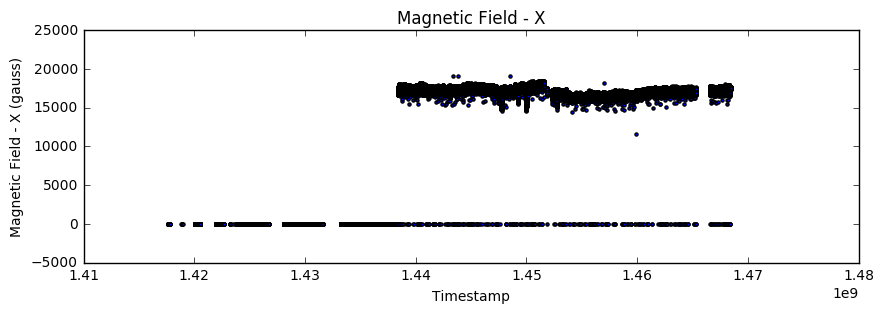

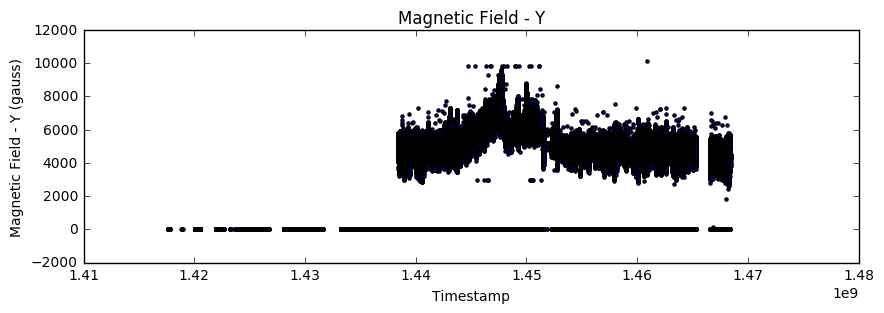

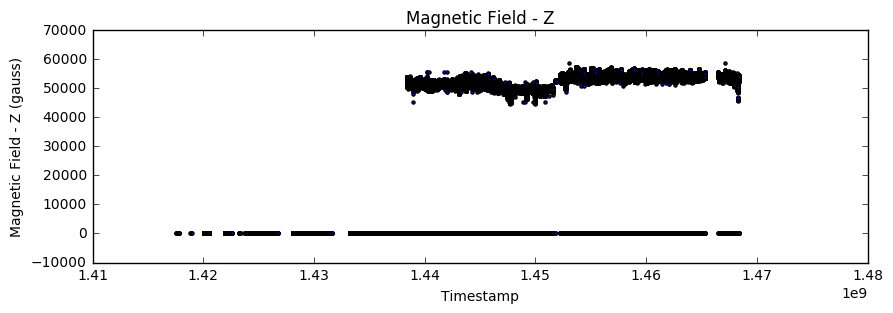

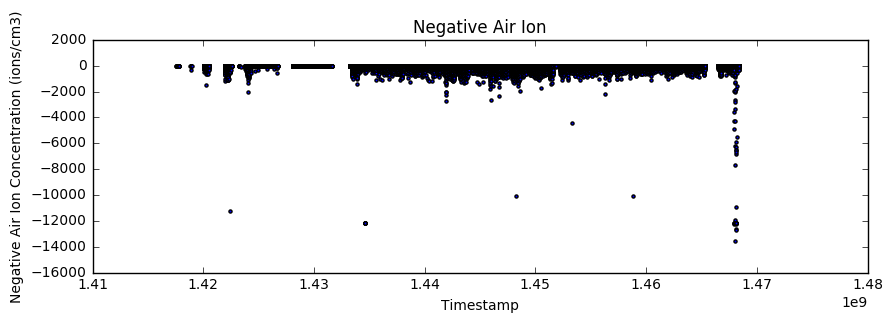

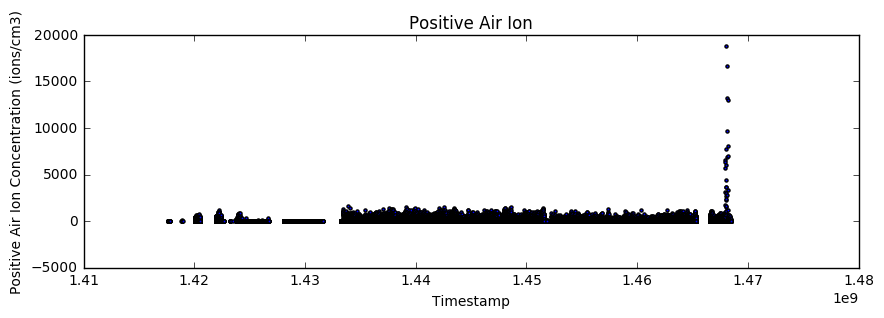

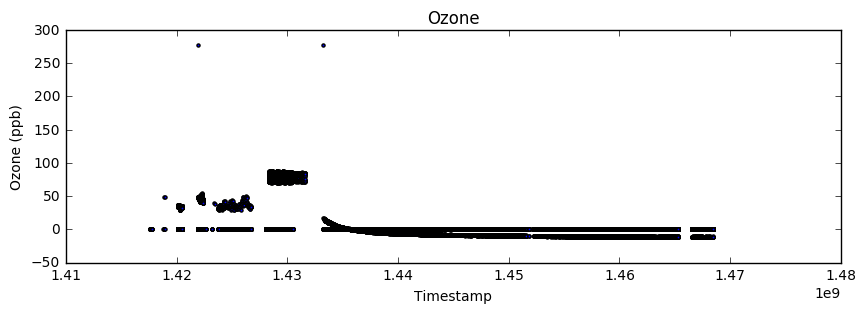

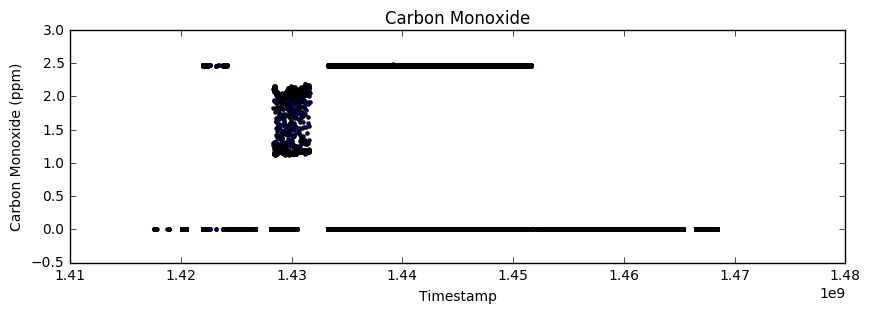

In [36]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station7'

print "Data from Station 7"
for i in range(d-1):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print standard[i]
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (gauss)', title='Magnetic Field - X')
figure.savefig(station+'_mag_x.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y
figure = plot_predictor(X[0], X[2], xlabel='Timestamp', ylabel='Magnetic Field - Y (gauss)', title='Magnetic Field - Y')
figure.savefig(station+'_mag_y.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z
figure = plot_predictor(X[0], X[3], xlabel='Timestamp', ylabel='Magnetic Field - Z (gauss)', title='Magnetic Field - Z')
figure.savefig(station+'_mag_z.png', bbox_inches='tight')

# plot the raw observations for Negative Air Ion Concentration
figure = plot_predictor(X[0], X[4], xlabel='Timestamp', ylabel='Negative Air Ion Concentration (ions/cm3)',
                        title='Negative Air Ion')
figure.savefig(station+'_neg_ion.png', bbox_inches='tight')

# plot the raw observations for Positive Air Ion Concentration
figure = plot_predictor(X[0], X[5], xlabel='Timestamp', ylabel='Positive Air Ion Concentration (ions/cm3)',
                        title='Positive Air Ion')
figure.savefig(station+'_pos_ion.png', bbox_inches='tight')

# plot the raw observations for Ozone (ppb)
figure = plot_predictor(X[0], X[6], xlabel='Timestamp', ylabel='Ozone (ppb)', title='Ozone')
figure.savefig(station+'_ozone.png', bbox_inches='tight')

# plot the raw observations for Carbon Monoxide (ppm)
figure = plot_predictor(X[0], X[7], xlabel='Timestamp', ylabel='Carbon Monoxide (ppm)', title='Carbon Monoxide')
figure.savefig(station+'_monoxide.png', bbox_inches='tight')


## Add Earthquake Data

We would to see if there are changes to the collected data before earthquakes that occur within a lat/long box around Kodiak Island during the same time window.


Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


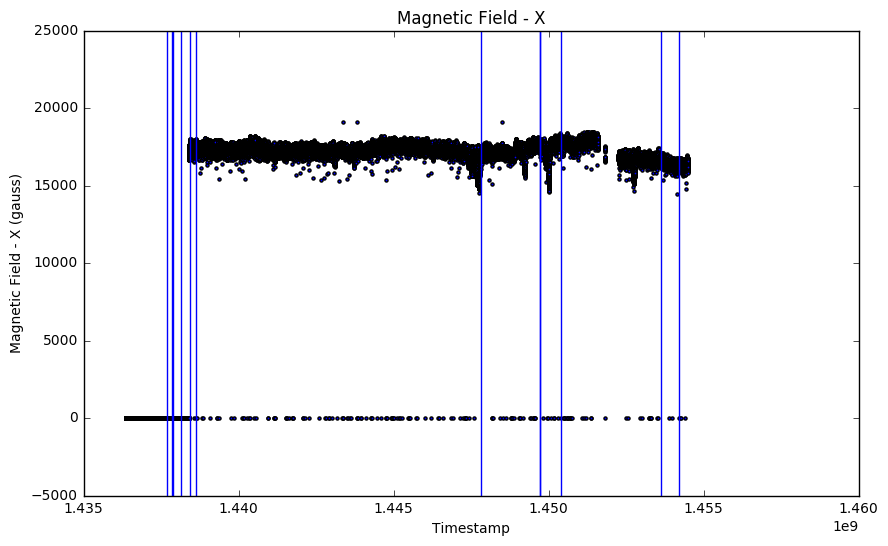

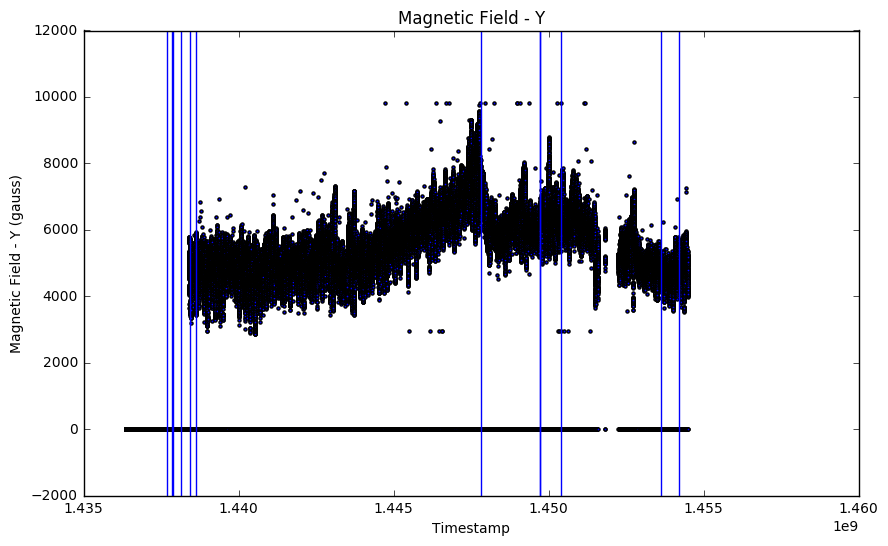

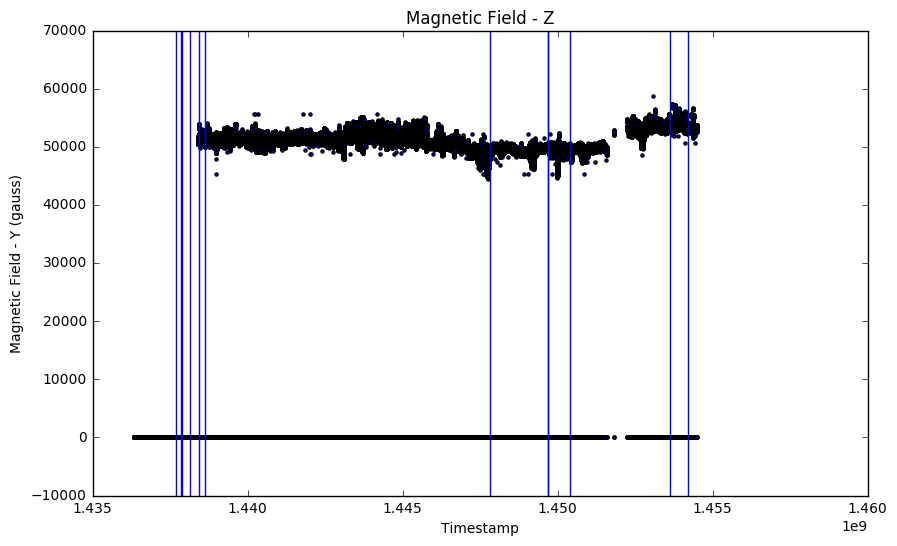

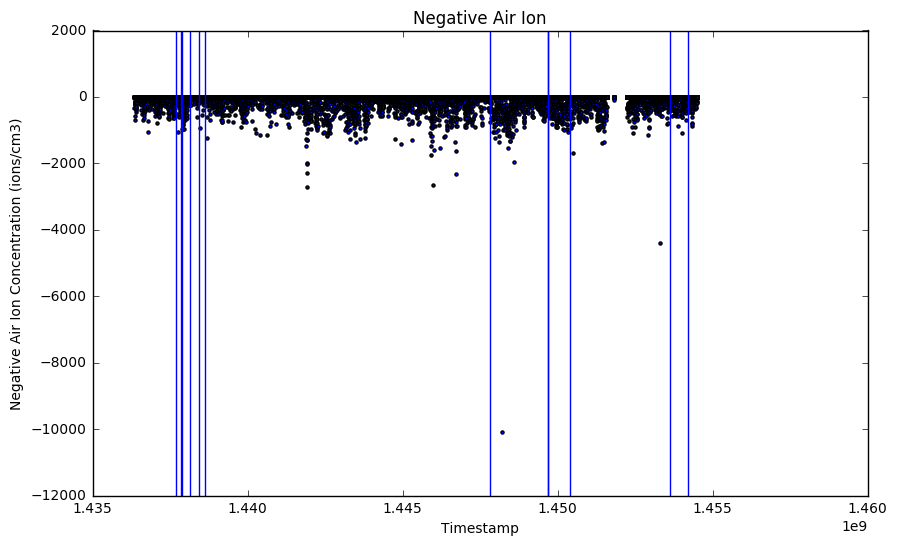

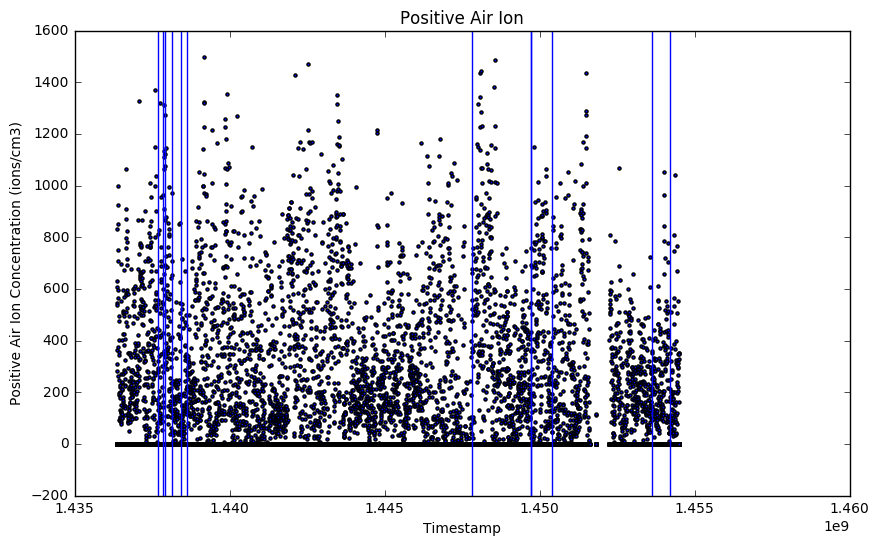

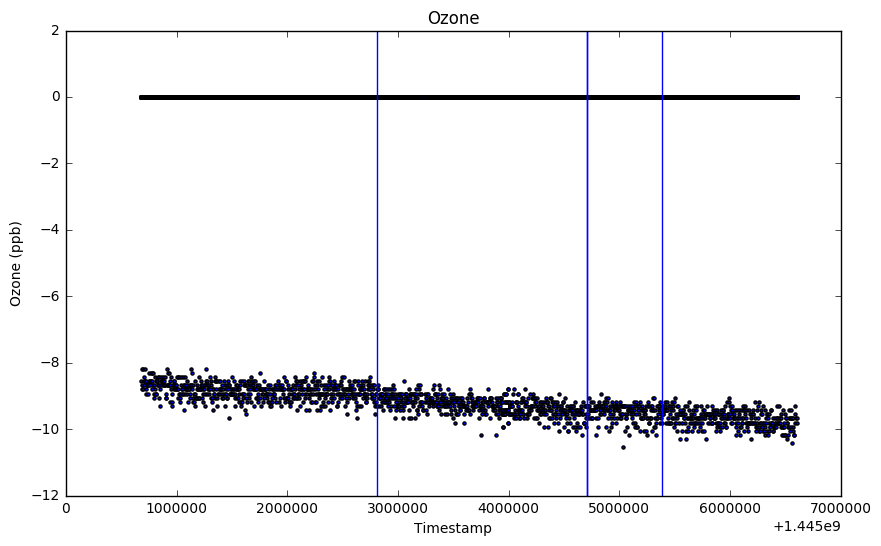

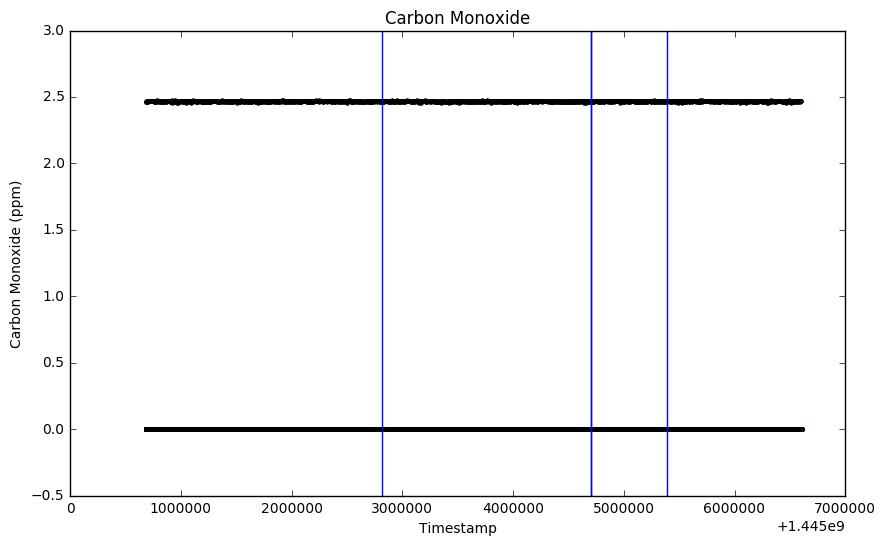

In [37]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station7'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1453631430,200,10)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (gauss)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (gauss)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (gauss)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq.png', bbox_inches='tight')

# plot the raw observations for Negative Air Ion Concentration and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[4], Y[0,:], xlabel='Timestamp', ylabel='Negative Air Ion Concentration (ions/cm3)', 
                        eqlabel='Mag5 Eq', title='Negative Air Ion', window=timewindow)
figure.savefig(station+'_neg_ion_mag5_eq.png', bbox_inches='tight')

# plot the raw observations for Positive Air Ion Concentration and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[5], Y[0,:], xlabel='Timestamp', ylabel='Positive Air Ion Concentration (ions/cm3)', 
                        eqlabel='Mag5 Eq', title='Positive Air Ion', window=timewindow)
figure.savefig(station+'_pos_ion_mag5_eq.png', bbox_inches='tight')

# plot the raw observations for Ozone (ppb) and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[6], Y[0,:], xlabel='Timestamp', ylabel='Ozone (ppb)', eqlabel='Mag5 Eq', title='Ozone')
figure.savefig(station+'_ozone_mag5_eq.png', bbox_inches='tight', window=timewindow)

# plot the raw observations for Carbon Monoxide (ppm) and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[7], Y[0,:], xlabel='Timestamp', ylabel='Carbon Monoxide (ppm)', eqlabel='Mag5 Eq', title='Carbon Monoxide')
figure.savefig(station+'_monoxide_mag5_eq.png', bbox_inches='tight', window=timewindow)

## Gather More Station 7 Data
We have observed 3 possible predictors for Mag 5+ earthquakes in the lat/long window around Kodiak Island based on visual inspection of Station 7 data:

* Magnetic Field X
* Magnetic Field Y
* Magnetic Field Z

Our original dataset covers '12-03-2014 05:40:00' to '2015-12-31 23:59:00'. John Scoville has located additional data from Station 7 in 7 seperate file covering Jan-July 2016. We now need to append these new data into the Station 7 dataset.  

As before, first print out some datapoints in the new files.

In [79]:
num = num_datapoints('alaska_data/kodiak-7-01-16.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak-7-01-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()


31321
There are 9 items per row of data
{'': '', '0C Magnetic Field - X ([nT])': '17275.4', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '', '0B Magnetic Field - Y ([nT])': '4856.40000000001', '0A Magnetic Field - Z ([nT])': '52871', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '2016-01-03 10:59:00', '50 Positive Air Ion Concentration (ions/cm3)': ''}
{'': '', '0C Magnetic Field - X ([nT])': '17168', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '', '0B Magnetic Field - Y ([nT])': '4749.00000000001', '0A Magnetic Field - Z ([nT])': '52817.2', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '2016-01-03 11:00:00', '50 Positive Air Ion Concentration (ions/cm3)': '111.250000000001'}
{'': '', '0C Magnetic Field - X ([nT])': '17221.6', '06 Ozone (ppb)': '-9.67976219230013', 'Carbon Monoxide (ppm)': '', '0B Magnetic Field - Y ([nT])': '', '0A Magnetic Field - Z ([nT])': '', '46 Negative Air Ion Concentration (ions/cm3)': '', 'Date': '2016-01-03 11:01:00', '50 Pos

## Check Headers of New Files

All 7 files containing monthly data of Alaska Station 7 have data ordered in the same columns of the original kodiak7.cvs.

In [80]:
with open('alaska_data/kodiak-7-01-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 01-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-02-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 02-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-03-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 03-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-04-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 04-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-05-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 05-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-06-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 06-2016'
print fieldnames
f.close()

with open('alaska_data/kodiak-7-07-16.csv', 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames

print 'Alaska Station 7 - 07-2016'
print fieldnames
f.close()

Alaska Station 7 - 01-2016
['Date', '0C Magnetic Field - X ([nT])', '0B Magnetic Field - Y ([nT])', '0A Magnetic Field - Z ([nT])', '46 Negative Air Ion Concentration (ions/cm3)', '50 Positive Air Ion Concentration (ions/cm3)', '06 Ozone (ppb)', 'Carbon Monoxide (ppm)', '']
Alaska Station 7 - 02-2016
['Date', '0C Magnetic Field - X ([nT])', '0B Magnetic Field - Y ([nT])', '0A Magnetic Field - Z ([nT])', '46 Negative Air Ion Concentration (ions/cm3)', '50 Positive Air Ion Concentration (ions/cm3)', '06 Ozone (ppb)', 'Carbon Monoxide (ppm)', '']
Alaska Station 7 - 03-2016
['Date', '0C Magnetic Field - X ([nT])', '0B Magnetic Field - Y ([nT])', '0A Magnetic Field - Z ([nT])', '46 Negative Air Ion Concentration (ions/cm3)', '50 Positive Air Ion Concentration (ions/cm3)', '06 Ozone (ppb)', 'Carbon Monoxide (ppm)', '']
Alaska Station 7 - 04-2016
['Date', '0C Magnetic Field - X ([nT])', '0B Magnetic Field - Y ([nT])', '0A Magnetic Field - Z ([nT])', '46 Negative Air Ion Concentration (ions/cm

## Regenerate alaska7.cvs

We will regenerate the alaska7.cvs by taking in predictor data from all kodiak7 CVS files and do the following:
* Convert UTC DateTime into Unix Timestamp  
* Store each row of earthquake data into a dictionary with 8 standard fields  
  1. 'Timestamp'  
  2. 'Magnetic Field - X (nT)'  
  3. 'Magnetic Field - Y (nT)'  
  4. 'Magnetic Field - Z (nT)'  
  5. 'Negative Air Ions (ions/cm3)'  
  6. 'Positive Air Ions (ions/cm3)'  
  7. 'Ozone (ppb)'  
  8. 'Carbon Monoxide (ppm)'  
* Write the dictionary to a new CVS file (alaska0-7 CVS files)

In [89]:
from datetime import datetime

f1 = file('alaska_data/kodiak7.csv', 'rb')
f2 = file('alaska_data/alaska7.csv', 'wb')

# Read in Alaska predictor data from kodiak7.cvs (up to 12/31/2015)
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        
        
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

f1.close()

file_list = ['alaska_data/kodiak-7-01-16.csv','alaska_data/kodiak-7-02-16.csv','alaska_data/kodiak-7-03-16.csv',
         'alaska_data/kodiak-7-04-16.csv','alaska_data/kodiak-7-05-16.csv','alaska_data/kodiak-7-06-16.csv',
         'alaska_data/kodiak-7-07-16.csv']

for filename in file_list:
    
    f1 = file(filename, 'rb')

    # Read in Alaska predictor data from kodiak-7-0X-16.csv (Jan-July 2016)

    c1 = csv.DictReader(f1)
    fieldnames = c1.fieldnames  # extract headers from raw data file

    for row in c1:
        try:
            # Convert 'date' string to datetime
            dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
        except ValueError:
            # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
            dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

        # Convert datetime to UNIX timestamp
        timestamp = datatime_2_timestamp(dt,utc=True)        
        
        c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

    f1.close()

f2.close()

Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


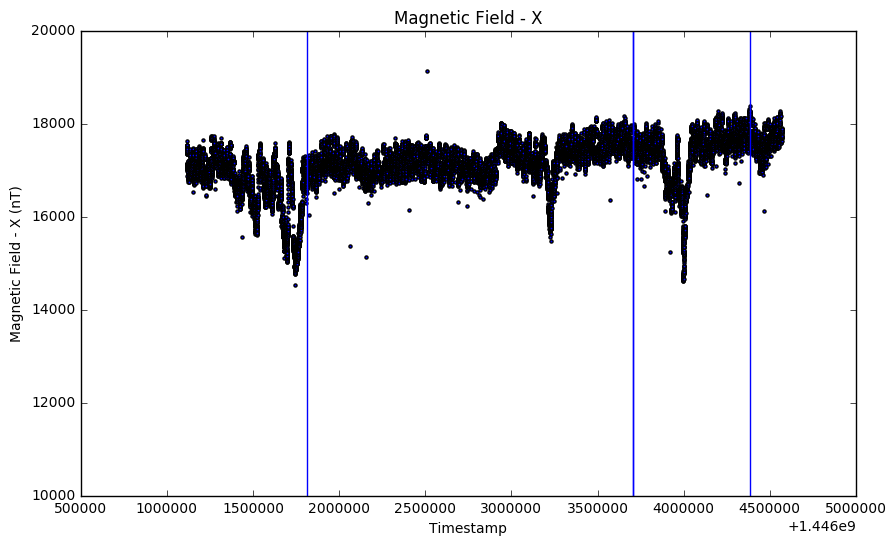

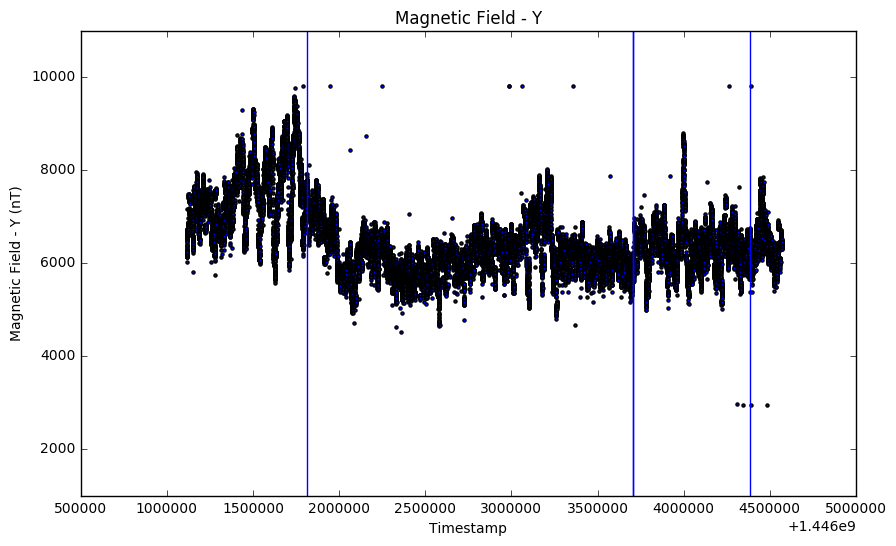

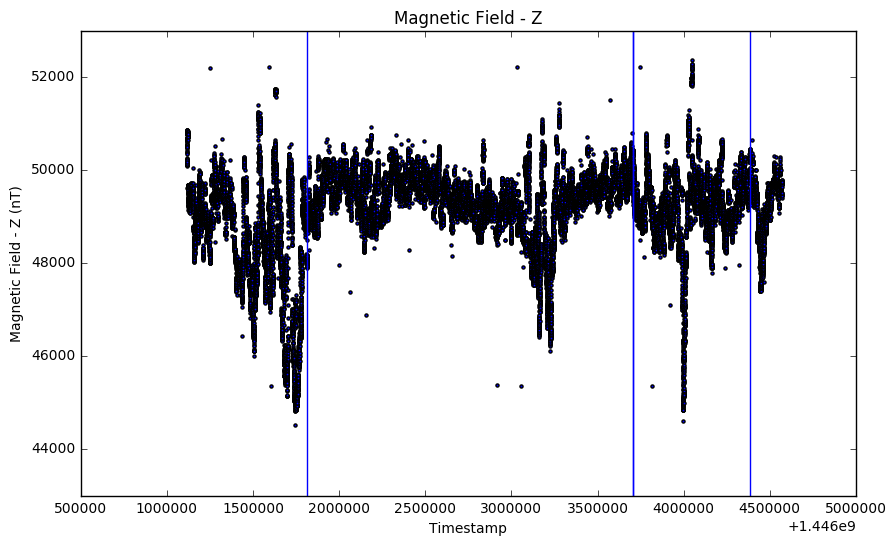

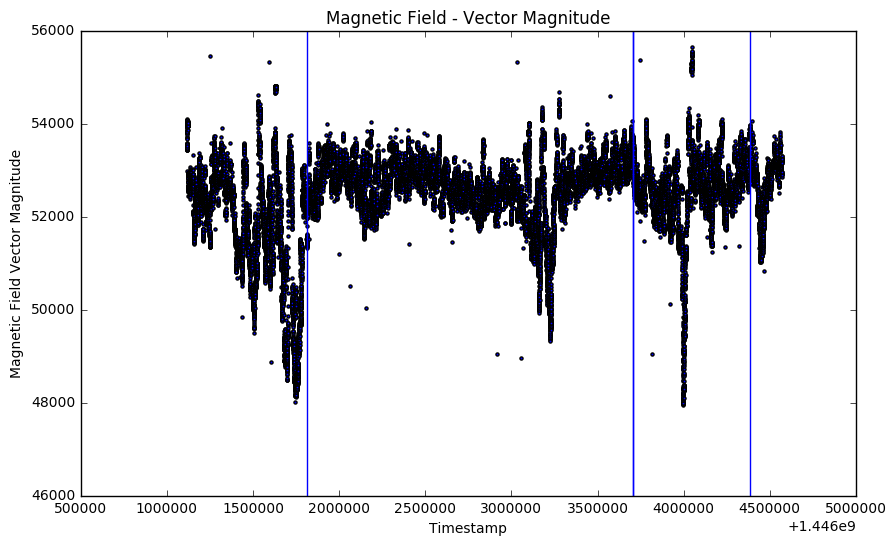

In [59]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station7'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1449706208,30,10)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)',ylimit=[10000,20000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[1000,11000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)',  ylimit=[43000,53000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', ylimit=[46000,56000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-12-10.png', bbox_inches='tight')


## Relook at Station 0,1,5,6

The predicting power of the magnetic field predictors is so good that we need to restudy the data from station 0,1,5 and 6. Ideally, we can find some useable magnetic field data which exhibit similar predictive behavior.

First, we look at Station 0. John was able to download additional data covering Jan2016 to Jul2017 at Station 0.

In the code below, we first count the number of datapoints (rows) in the CVS file.

Then we print the first 5 rows and the last 5 rows. In the case of 'alaska_data/kodiak0.csv', we figure out that the data is collected between '10-25-2014 06:45:00' and '2016-01-24 09:16:00', generating 414,827 datapoints.

In [147]:
num = num_datapoints('alaska_data/kodiak0.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak0.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()

414827
There are 9 items per row of data
{'': '', '0C Magnetic Field - Z (gauss)': '-0.20153', '0A Magnetic Field - X (gauss)': '0.747372', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '2.76500785000007', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '0.170928', 'Date': '10-25-2014 06:45:00', '50 Positive Air Ions (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.20157', '0A Magnetic Field - X (gauss)': '0.747254', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '4.24631950000003', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '0.16698', 'Date': '11-02-2014 11:15:00', '50 Positive Air Ions (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.201556', '0A Magnetic Field - X (gauss)': '0.747128', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '1.28420125000002', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '0.16976', 'Date': '11-03-2014 12:30:00', '50 Positive Air Ions (ions/cm3)': ''}


In [158]:
from datetime import datetime

f1 = file('alaska_data/kodiak0.csv', 'rb')
f2 = file('alaska_data/alaska0.csv', 'wb')

# Read in Alaska predictor data from kodiak0.cvs (up to 1/24/2016)
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        
        
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

f1.close()


file_list = ['alaska_data/kodiak-0-01-16.csv','alaska_data/kodiak-0-02-16.csv','alaska_data/kodiak-0-03-16.csv',
         'alaska_data/kodiak-0-04-16.csv','alaska_data/kodiak-0-05-16.csv','alaska_data/kodiak-0-06-16.csv',
         'alaska_data/kodiak-0-07-16.csv','alaska_data/kodiak-0-08-16.csv','alaska_data/kodiak-0-09-16.csv',
         'alaska_data/kodiak-0-10-16.csv','alaska_data/kodiak-0-11-16.csv','alaska_data/kodiak-0-12-16.csv',
         'alaska_data/kodiak-0-01-17.csv','alaska_data/kodiak-0-02-17.csv','alaska_data/kodiak-0-03-17.csv',             
         'alaska_data/kodiak-0-04-17.csv']

for filename in file_list:
    
    f1 = file(filename, 'rb')

    # Read in Alaska predictor data from kodiak-7-0X-16.csv (Jan-July 2016)

    c1 = csv.DictReader(f1)
    fieldnames = c1.fieldnames  # extract headers from raw data file

    for row in c1:
        try:
            # Convert 'date' string to datetime
            dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
        except ValueError:
            # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
            dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

        # Convert datetime to UNIX timestamp
        timestamp = datatime_2_timestamp(dt,utc=True)        
        
        c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

    f1.close()

f2.close()

In [14]:
filename = 'alaska_data/alaska5.csv'

num = num_datapoints(filename)
X = np.zeros((9,num))
print X.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.DictReader(f)
    fieldnames = reader.fieldnames
    print fieldnames
    
    for row in reader:
        X[0,i] = row[fieldnames[0]]
        X[1,i] = clean_data(row, fieldnames[1])
        X[2,i] = clean_data(row, fieldnames[2])
        X[3,i] = clean_data(row, fieldnames[3])
        X[4,i] = clean_data(row, fieldnames[4])
        X[5,i] = clean_data(row, fieldnames[5])
        X[6,i] = clean_data(row, fieldnames[6])
        X[7,i] = clean_data(row, fieldnames[7]) 
        X[8,i] = np.sqrt(X[1,i]**2 + X[2,i]**2 + X[3,i]**2)   # magnitude of the magnetic field vector
        
        i += 1
               
f.close()

num_bytes = sys.getsizeof(X) # Return the size of an object in bytes
print "Memory used for numpy array = %d bytes" % num_bytes

bytes_element = num_bytes/(8.0*num)
print "Average byte per element in numpy array = %.2f" % bytes_element

(9L, 868129L)
['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']
Memory used for numpy array = 62505400 bytes
Average byte per element in numpy array = 9.00


## Station 0 Data - Pretty Bad!

There appears to be wide fluctuation in the magnetic field readouts.

Data from Station 0
Timestamp
Min: 1414219500.000000
Max: 1491866640.000000
Magnetic Field - X (nT)
Min: -62837.200000
Max: 173002.600000
Magnetic Field - Y (nT)
Min: -174302.600000
Max: 29653.800000
Magnetic Field - Z (nT)
Min: -150449.720000
Max: 144702.600000
Negative Air Ions (ions/cm3)
Min: -13660.620000
Max: 0.000000
Positive Air Ions (ions/cm3)
Min: 0.000000
Max: 7070.310000
Ozone (ppb)
Min: -39.970000
Max: 160.842258
Carbon Monoxide (ppm)
Min: -1151.000000
Max: 193.322819


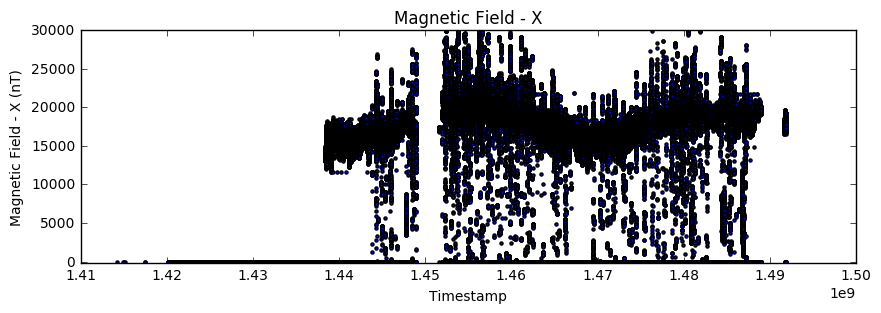

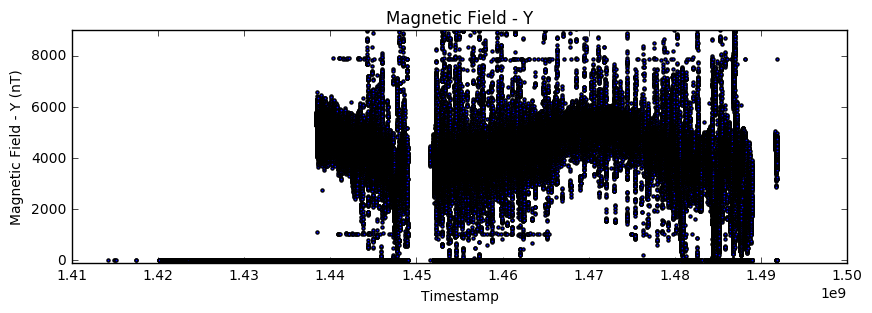

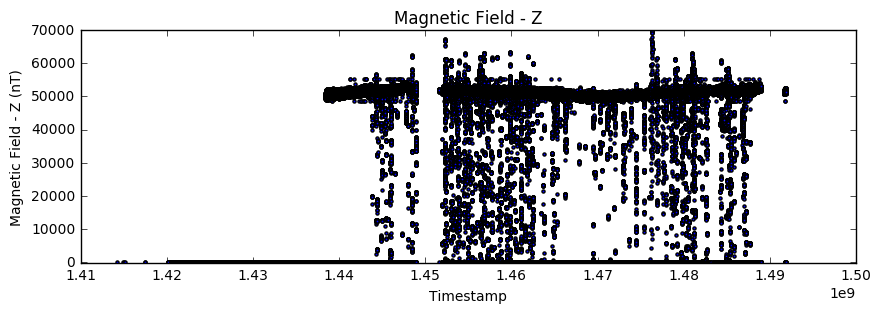

In [160]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station0'

print "Data from Station 0"
for i in range(d-1):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print standard[i]
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', title='Magnetic Field - X', 
                        ylimit=[-100,30000])
figure.savefig(station+'_mag_x.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y
figure = plot_predictor(X[0], X[2], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', title='Magnetic Field - Y', 
                        ylimit=[-100,9000])
figure.savefig(station+'_mag_y.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z
figure = plot_predictor(X[0], X[3], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', title='Magnetic Field - Z', 
                        ylimit=[-100,70000])
figure.savefig(station+'_mag_z.png', bbox_inches='tight')



## Station 0 is No GOOD

There is too much noise in the magnetic field data from Station 0. ** We made a decision to throw it out! **

Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


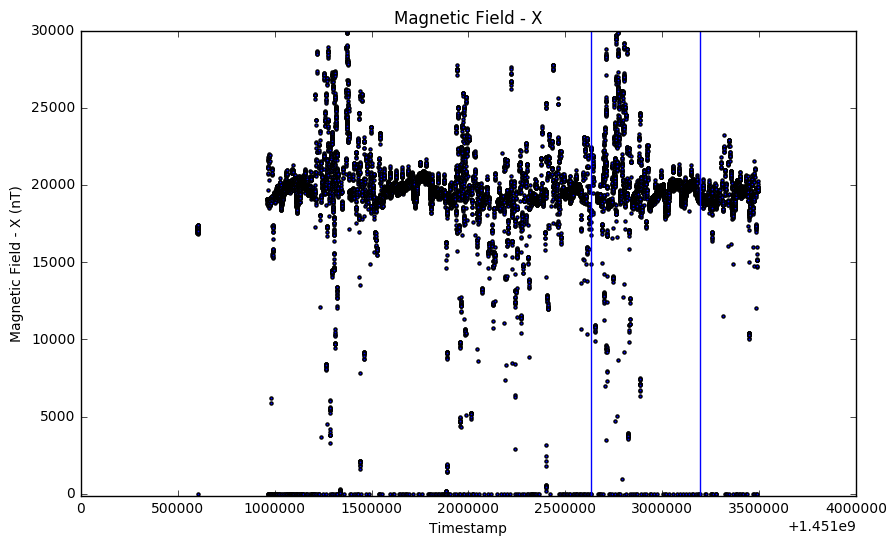

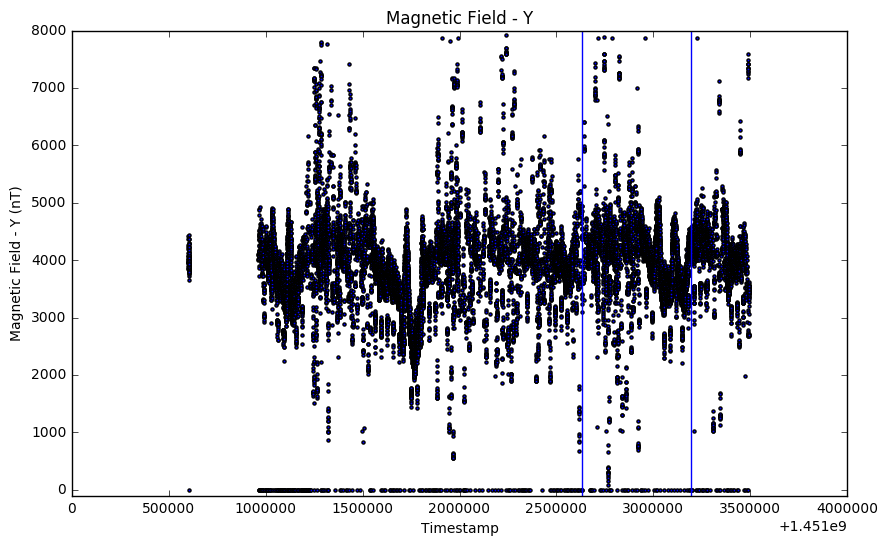

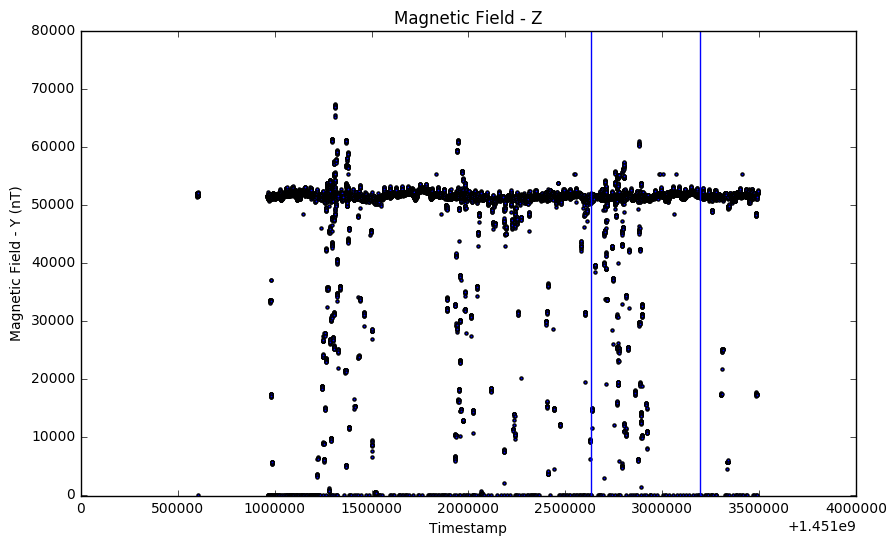

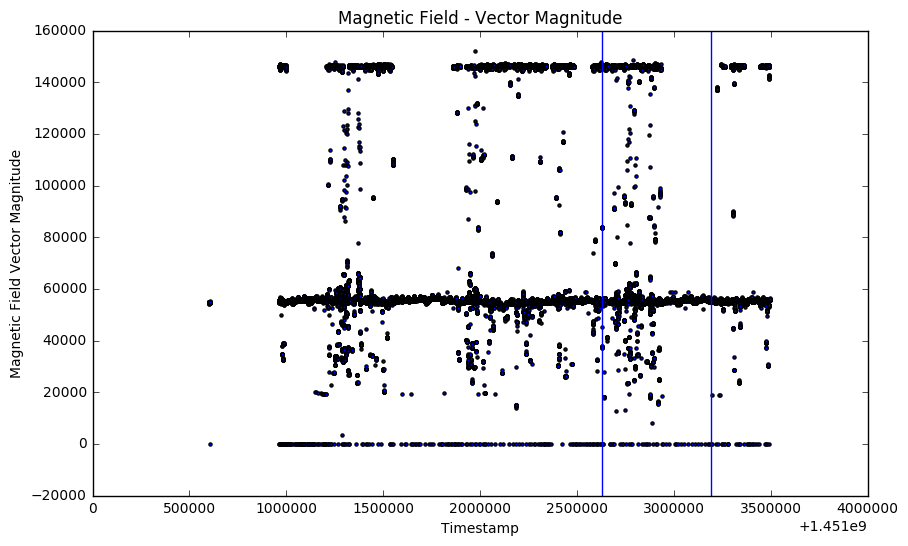

In [163]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station7'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1453631430,30,10)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[-100,30000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,8000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,80000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-12-10.png', bbox_inches='tight')

## Relook at Station 1

We now look at Station 1. John was able to download additional data covering Jan2016 to May2016 at Station 1.

In the code below, we first count the number of datapoints (rows) in the CVS file.

Then we print the first 5 rows and the last 5 rows. In the case of 'alaska_data/kodiak1.csv', we figure out that the data is collected between '0-25-2014 12:45:02' and '2015-08-25 22:58:00', generating 213,279 datapoints.

In [164]:
num = num_datapoints('alaska_data/kodiak1.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak1.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()

213279
There are 9 items per row of data
{'': '', '0C Magnetic Field - Z (gauss)': '-0.0669919999999999', '0A Magnetic Field - X (gauss)': '-0.0234860000000001', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '-0.120158', 'Date': '10-25-2014 12:45:02', '50 Positive Air Ions (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.20153', '0A Magnetic Field - X (gauss)': '-0.0308280000000001', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '-0.16995', 'Date': '10-26-2014 08:50:01', '50 Positive Air Ions (ions/cm3)': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-0.201574', '0A Magnetic Field - X (gauss)': '-0.0741459999999998', '06 Ozone (ppb)': '', 'Carbon Monoxide (ppm)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '0.157482', 'Date': '11-07-2014 01:48:00', '50 Positive Air Ions (ions/cm3)': ''}
{

In [165]:
from datetime import datetime

f1 = file('alaska_data/kodiak1.csv', 'rb')
f2 = file('alaska_data/alaska1.csv', 'wb')

# Read in Alaska predictor data from kodiak0.cvs (up to 8/25/2015)
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        
        
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

f1.close()


file_list = ['alaska_data/kodiak-1-01-16.csv','alaska_data/kodiak-1-02-16.csv','alaska_data/kodiak-1-03-16.csv',
         'alaska_data/kodiak-1-04-16.csv','alaska_data/kodiak-1-05-16.csv']

for filename in file_list:
    
    f1 = file(filename, 'rb')

    # Read in Alaska predictor data from kodiak-7-0X-16.csv (Jan-July 2016)

    c1 = csv.DictReader(f1)
    fieldnames = c1.fieldnames  # extract headers from raw data file

    for row in c1:
        try:
            # Convert 'date' string to datetime
            dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
        except ValueError:
            # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
            dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

        # Convert datetime to UNIX timestamp
        timestamp = datatime_2_timestamp(dt,utc=True)        
        
        c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

    f1.close()

f2.close()

## Station 1 Data - Cleaner but Huge Gaps!

Station 1's magnetic field readouts fluctuate less than Station 0 but there are huge time gaps between data.

Data from Station 1
Timestamp
Min: 1414241102.000000
Max: 1464083460.000000
Magnetic Field - X (nT)
Min: -156774.900000
Max: 200000.000000
Magnetic Field - Y (nT)
Min: -177600.000000
Max: 150896.080000
Magnetic Field - Z (nT)
Min: -126645.760000
Max: 216500.000000
Negative Air Ions (ions/cm3)
Min: -10696.070000
Max: 0.000000
Positive Air Ions (ions/cm3)
Min: 0.000000
Max: 9787.500000
Ozone (ppb)
Min: -9.999440
Max: 219.843359
Carbon Monoxide (ppm)
Min: 0.000000
Max: 11.854535


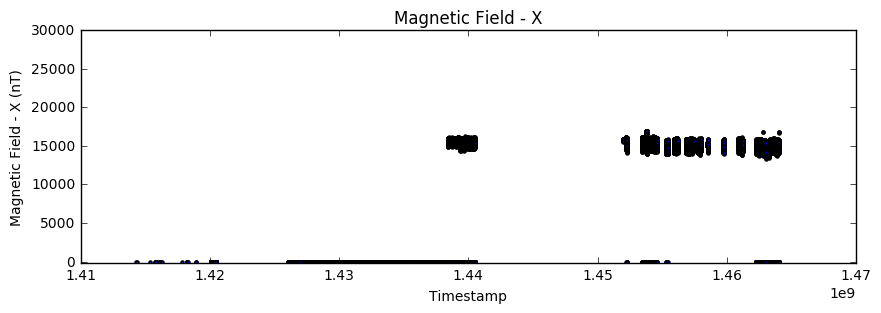

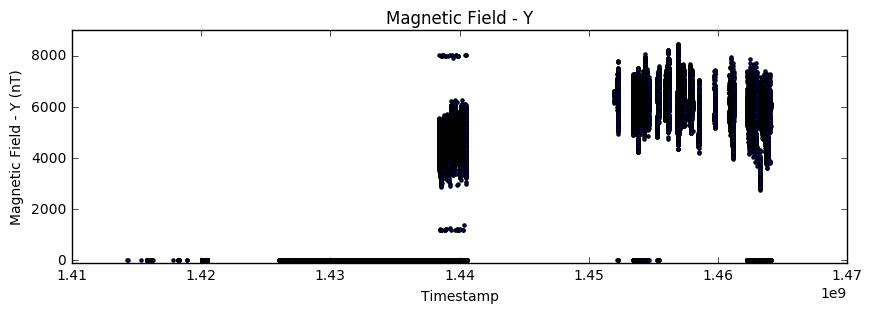

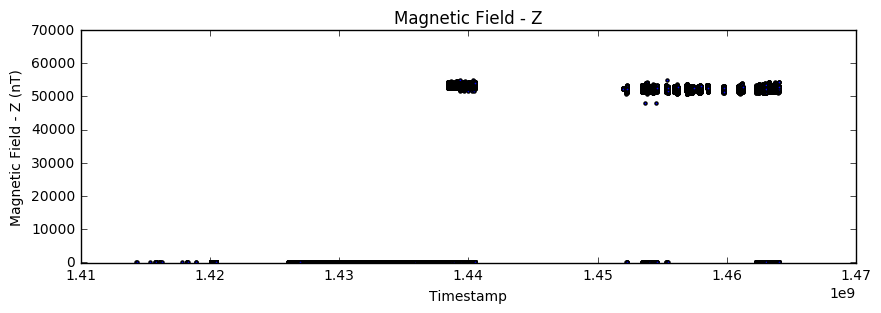

In [167]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station1'

print "Data from Station 1"
for i in range(d-1):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print standard[i]
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', title='Magnetic Field - X', 
                        ylimit=[-100,30000])
figure.savefig(station+'_mag_x.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y
figure = plot_predictor(X[0], X[2], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', title='Magnetic Field - Y', 
                        ylimit=[-100,9000])
figure.savefig(station+'_mag_y.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z
figure = plot_predictor(X[0], X[3], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', title='Magnetic Field - Z', 
                        ylimit=[-100,70000])
figure.savefig(station+'_mag_z.png', bbox_inches='tight')

## Station 1 - Interference from Magnetic Source

There appears to be magnetic interference from some source close to Station 1. ** The data is not useable. **

However, it will be worthwhile for us to locate the source of interference for our own knowledge.

Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


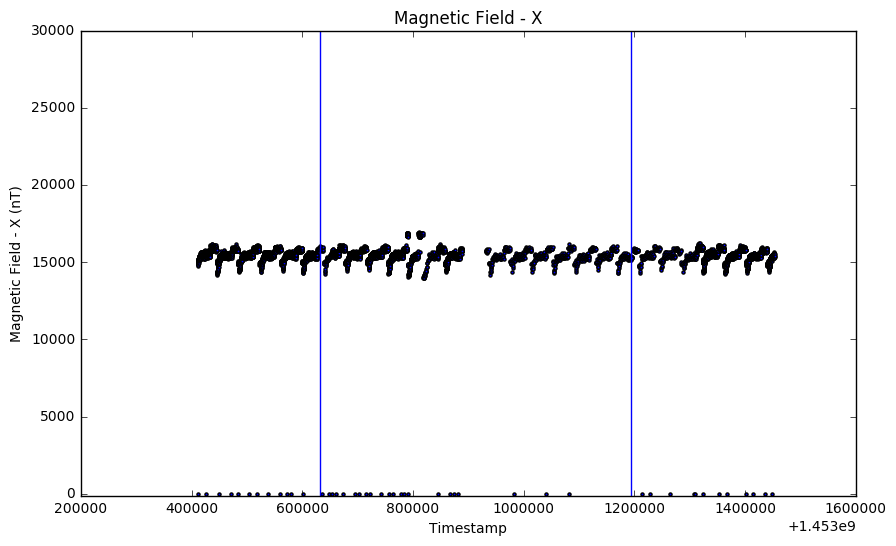

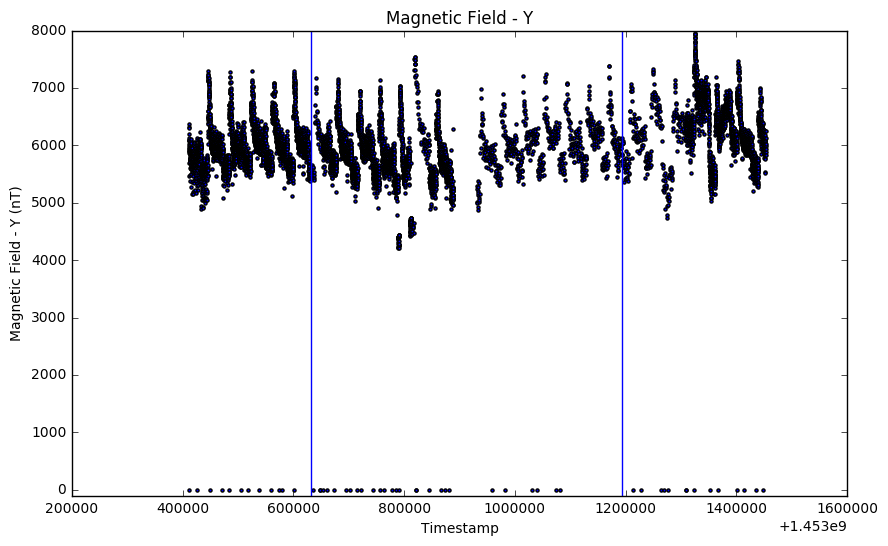

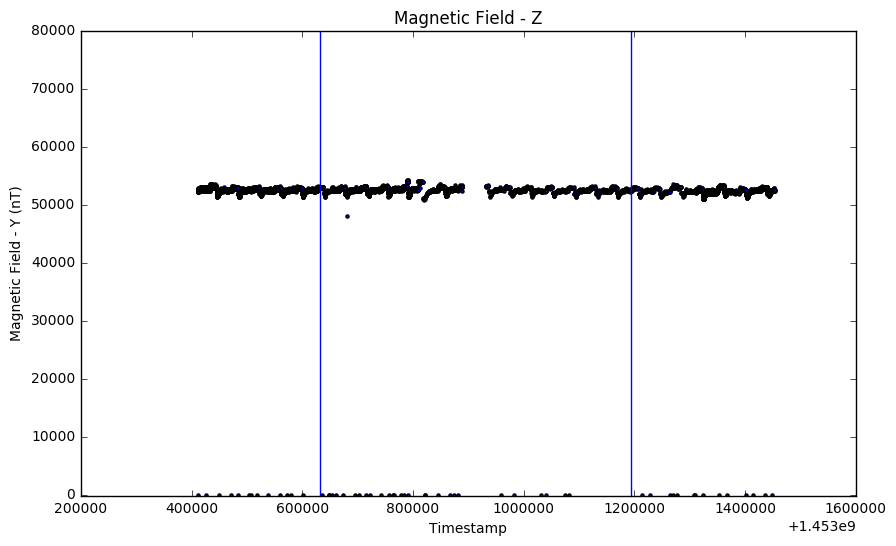

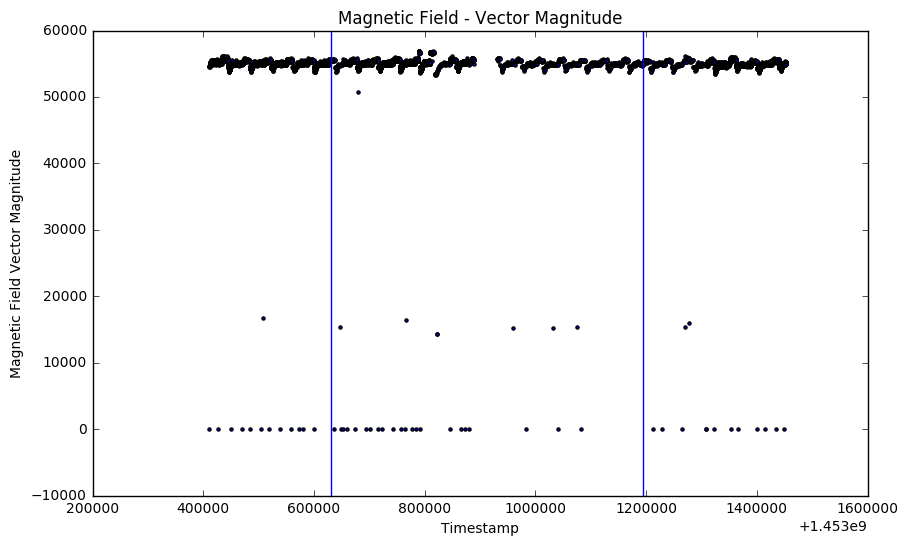

In [24]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station1'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1454194019,14,3)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[-100,30000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,8000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,80000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-12-10.png', bbox_inches='tight')

## Relook at Station 5

We now look at Station 5. John was able to download additional data covering Jan2016 to Dec2016 at Station 5.

In the code below, we first count the number of datapoints (rows) in the CVS file.

Then we print the first 5 rows and the last 5 rows. In the case of 'alaska_data/kodiak1.csv', we figure out that the data is collected between '11-02-2014 14:07:02' and '2016-01-25 09:13:00', generating 493,049 datapoints.

In [12]:
num = num_datapoints('alaska_data/kodiak5.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak5.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()

493049
There are 9 items per row of data
{'': '', '0C Magnetic Field - Z (gauss)': '0.120150385', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.0690403660000001', '06 Ozone (ppb)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '-0.990917181', 'Date': '11-02-2014 14:07:02', '50 Positive Air Ions (ions/cm3)': '91.2499999999983'}
{'': '', '0C Magnetic Field - Z (gauss)': '0.120150385', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.0693083659999998', '06 Ozone (ppb)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '-0.991453181', 'Date': '11-02-2014 14:27:03', '50 Positive Air Ions (ions/cm3)': '2648.75'}
{'': '', '0C Magnetic Field - Z (gauss)': '0.120150385', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-0.0681003660000002', '06 Ozone (ppb)': '', '46 Negative Air Ions (ions/cm3)': '', '0B Magnetic Field - Y (gauss)': '-0.991185181', 'Date': '11-02-2014 14:47:00', 

In [13]:
from datetime import datetime

f1 = file('alaska_data/kodiak5.csv', 'rb')
f2 = file('alaska_data/alaska5.csv', 'wb')

# Read in Alaska predictor data from kodiak5.cvs (up to 1/25/2016)
c1 = csv.DictReader(f1)
fieldnames = c1.fieldnames  # extract headers from raw data file


standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

c2 = csv.DictWriter(f2, fieldnames=standard)
c2.writeheader()

for row in c1:
    try:
        # Convert 'date' string to datetime
        dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
    except ValueError:
        # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
        dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

    # Convert datetime to UNIX timestamp
    timestamp = datatime_2_timestamp(dt,utc=True)        
        
    c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

f1.close()


file_list = ['alaska_data/kodiak-5-01-16.csv','alaska_data/kodiak-5-02-16.csv','alaska_data/kodiak-5-03-16.csv',
         'alaska_data/kodiak-5-04-16.csv','alaska_data/kodiak-5-05-16.csv','alaska_data/kodiak-5-06-16.csv',
         'alaska_data/kodiak-5-07-16.csv','alaska_data/kodiak-5-08-16.csv','alaska_data/kodiak-5-09-16.csv',
         'alaska_data/kodiak-5-10-16.csv','alaska_data/kodiak-5-11-16.csv','alaska_data/kodiak-5-12-16.csv']

for filename in file_list:
    
    f1 = file(filename, 'rb')

    # Read in Alaska predictor data from kodiak-7-0X-16.csv (Jan-July 2016)

    c1 = csv.DictReader(f1)
    fieldnames = c1.fieldnames  # extract headers from raw data file

    for row in c1:
        try:
            # Convert 'date' string to datetime
            dt = datetime.strptime(row[fieldnames[0]], '%m-%d-%Y %H:%M:%S') 
        except ValueError:
            # This takes care of an oddity in the dataset whereby the date switches from 12-5-2013 to 2013-12-5
            dt = datetime.strptime(row[fieldnames[0]], '%Y-%m-%d %H:%M:%S')  

        # Convert datetime to UNIX timestamp
        timestamp = datatime_2_timestamp(dt,utc=True)        
        
        c2.writerow({'Timestamp':timestamp, 'Magnetic Field - X (nT)':row[fieldnames[1]], 
                'Magnetic Field - Y (nT)':row[fieldnames[2]],
                'Magnetic Field - Z (nT)':row[fieldnames[3]], 
                'Negative Air Ions (ions/cm3)':row[fieldnames[4]], 
                'Positive Air Ions (ions/cm3)':row[fieldnames[5]],
                'Ozone (ppb)':row[fieldnames[6]], 'Carbon Monoxide (ppm)':row[fieldnames[7]]})

    f1.close()

f2.close()

## Station 5 is No GOOD

There is too much noise in the magnetic field data from Station 5. ** We made a decision to throw it out! **

Data from Station 5
Timestamp
Min: 1414937222.000000
Max: 1481073240.000000
Magnetic Field - X (nT)
Min: -6600.000000
Max: 48252.200000
Magnetic Field - Y (nT)
Min: -11245.400000
Max: 36221.600000
Magnetic Field - Z (nT)
Min: -0.720158
Max: 65554.800000
Negative Air Ions (ions/cm3)
Min: -10797.150000
Max: 0.000000
Positive Air Ions (ions/cm3)
Min: 0.000000
Max: 22048.750000
Ozone (ppb)
Min: -35.970000
Max: 25.747814
Carbon Monoxide (ppm)
Min: -1130.062000
Max: 10.373728


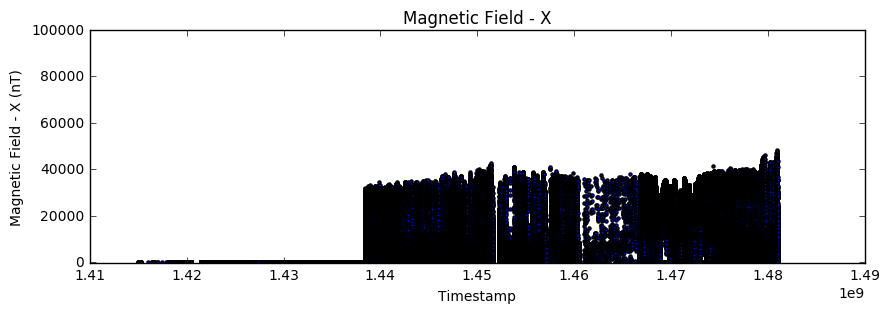

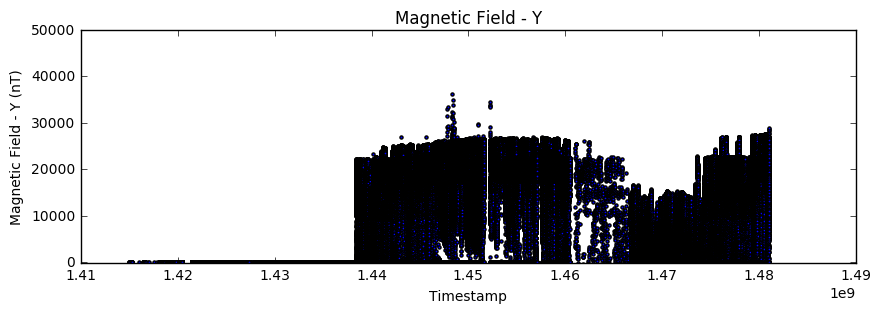

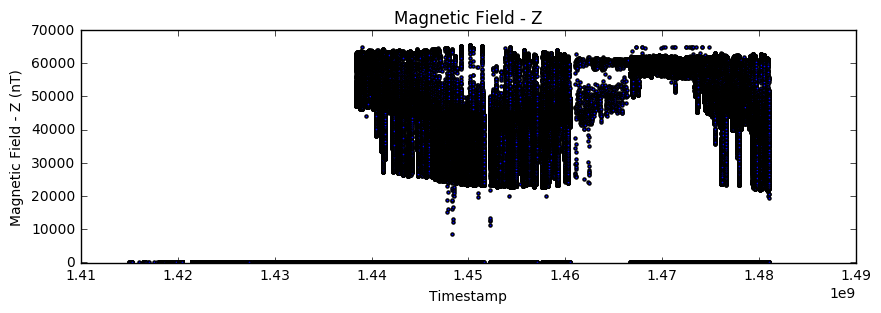

In [18]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station5'

print "Data from Station 5"
for i in range(d-1):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print standard[i]
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', title='Magnetic Field - X', 
                        ylimit=[-100,100000])
figure.savefig(station+'_mag_x.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y
figure = plot_predictor(X[0], X[2], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', title='Magnetic Field - Y', 
                        ylimit=[-100,50000])
figure.savefig(station+'_mag_y.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z
figure = plot_predictor(X[0], X[3], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', title='Magnetic Field - Z', 
                        ylimit=[-100,70000])
figure.savefig(station+'_mag_z.png', bbox_inches='tight')

Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


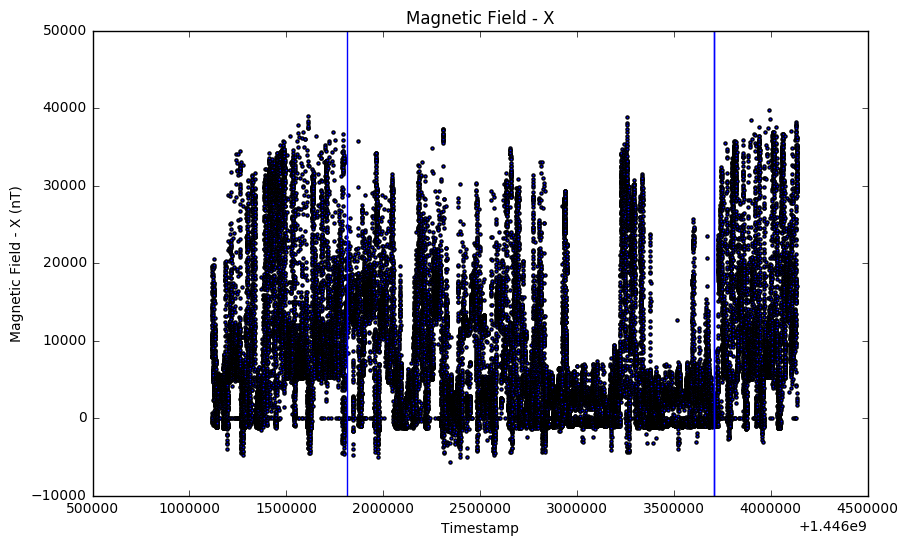

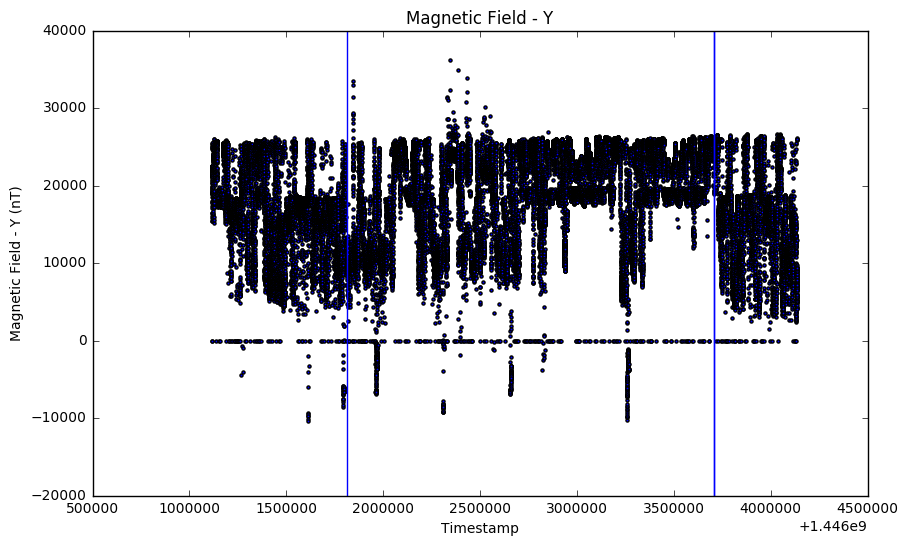

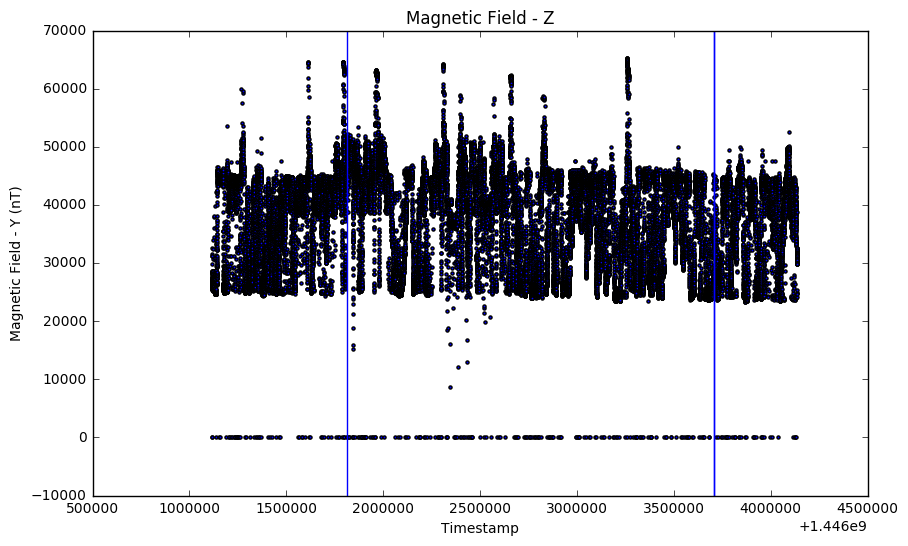

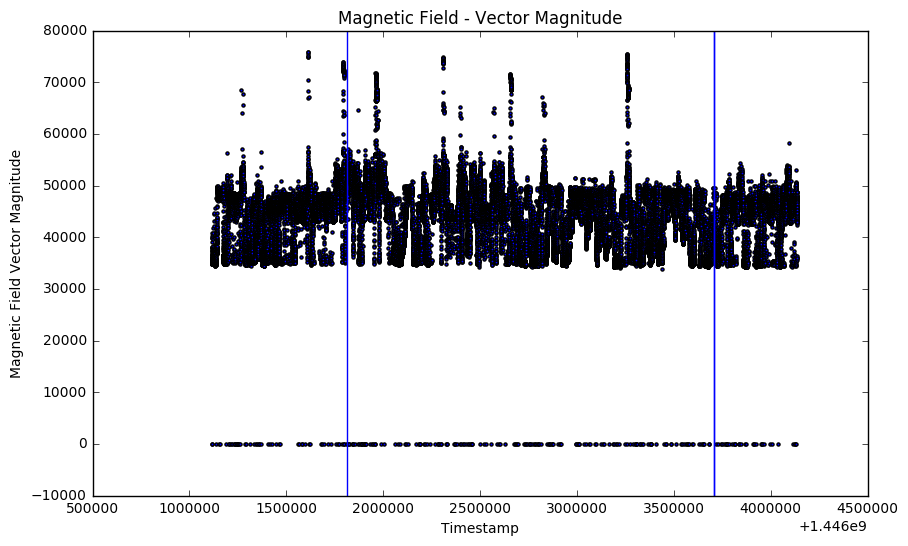

In [20]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station7'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1449706255,30,5)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-12-10.png', bbox_inches='tight')

## Relook at Station 6

We now look at Station 6. 

In the code below, we first count the number of datapoints (rows) in the CVS file.

Then we print the first 5 rows and the last 5 rows. In the case of 'alaska_data/kodiak6.csv', we figure out that the data is collected between '01-01-2015 11:00:01' and '2015-12-31 23:59:00', generating 105,148 datapoints.

In [25]:
num = num_datapoints('alaska_data/kodiak6.csv', dict=True)  # The data has header
print num

with open('alaska_data/kodiak6.csv', 'rb') as f:
    reader = csv.DictReader(f)
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > num-5:    
            print row   # Print last 5 rows      
                
f.close()

105148
There are 9 items per row of data
{'': '', '0C Magnetic Field - Z (gauss)': '-2.66', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-2.55', '01 SensorVoltage[V]': '', '0B Magnetic Field - Y (gauss)': '-2.5', '03 Ozone (ppb)': '', 'Date': '01-01-2015 11:00:01', '02 SensorVoltage[V]': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-2.66', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-2.55', '01 SensorVoltage[V]': '', '0B Magnetic Field - Y (gauss)': '-2.5', '03 Ozone (ppb)': '', 'Date': '01-02-2015 03:00:01', '02 SensorVoltage[V]': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-2.66', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-2.55', '01 SensorVoltage[V]': '', '0B Magnetic Field - Y (gauss)': '-2.5', '03 Ozone (ppb)': '', 'Date': '01-02-2015 14:00:01', '02 SensorVoltage[V]': ''}
{'': '', '0C Magnetic Field - Z (gauss)': '-2.66', '04 Carbon Monoxide (ppm)': '', '0A Magnetic Field - X (gauss)': '-2.55', '01 SensorVolta

## Station 6 is No GOOD

Station 6's magnetic field data has huge gaps and widely fluctuating values. ** It cannot be analyzed. **

Mag 5+ earthquakes (UNIX timestamps):
[  1.45419402e+09   1.45363143e+09   1.45038802e+09   1.44970626e+09
   1.44970621e+09   1.44781208e+09   1.43862011e+09   1.43842936e+09
   1.43813736e+09   1.43789565e+09   1.43785426e+09   1.43769316e+09
   1.43566135e+09   1.43518514e+09   1.43415810e+09   1.43288281e+09
   1.42788664e+09   1.42303834e+09   1.42225726e+09]


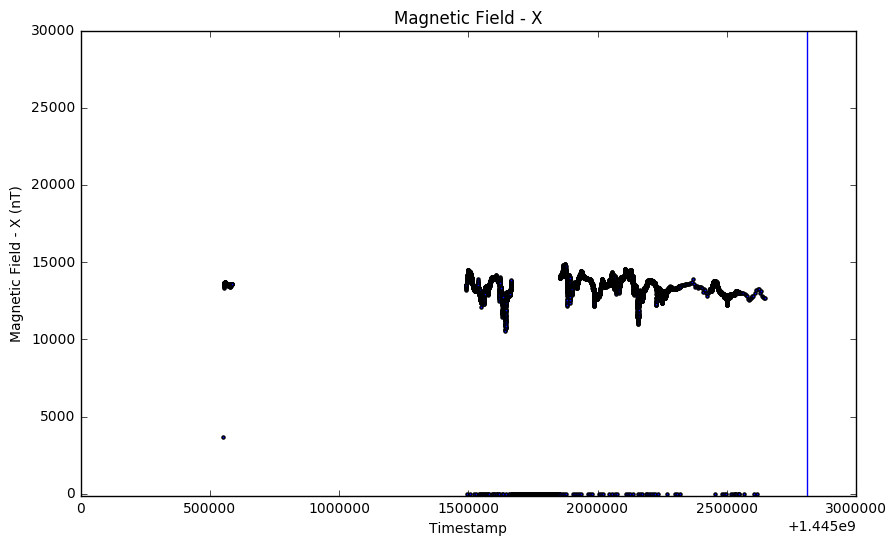

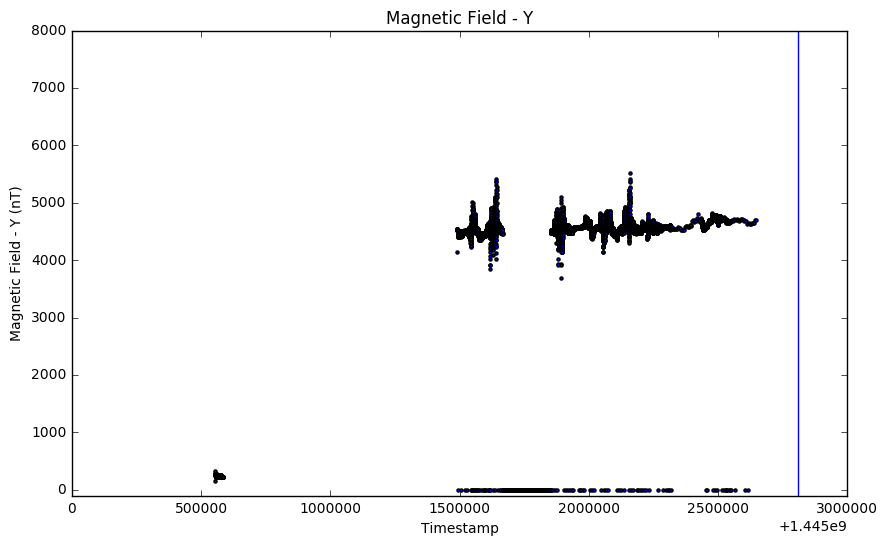

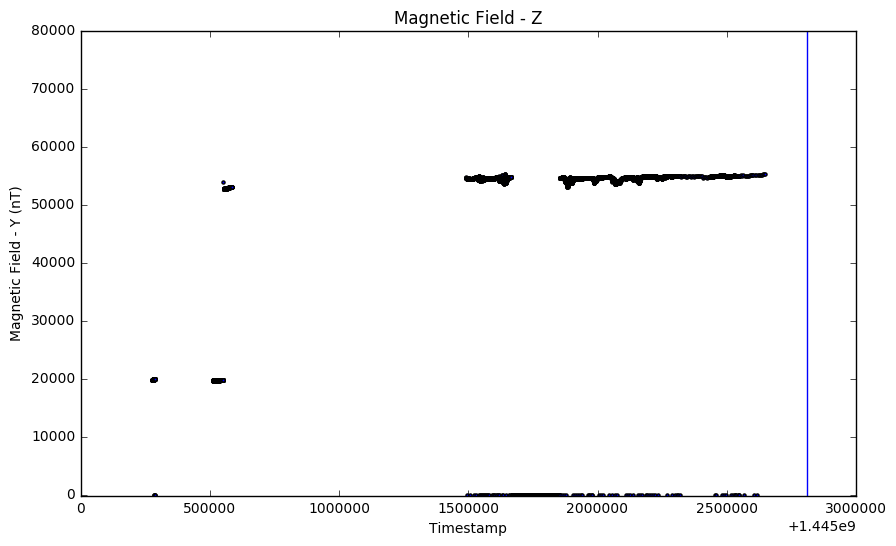

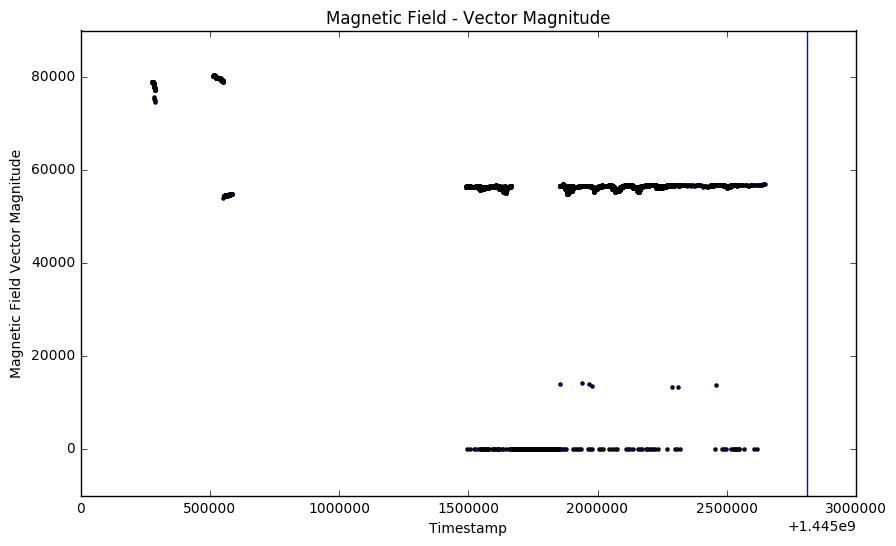

In [33]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (gauss)', 'Magnetic Field - Y (gauss)', 'Magnetic Field - Z (gauss)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station6'

print "Mag 5+ earthquakes (UNIX timestamps):"
print Y[0,:]

timewindow = (1447812083,30,10)

# plot the raw observations for Magnetic Field - X and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[1], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', ylimit=[-100,30000],
                        eqlabel='Mag5 Eq', title='Magnetic Field - X', window=timewindow)
figure.savefig(station+'_mag_x_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[2], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,8000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Y', window=timewindow)
figure.savefig(station+'_mag_y_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[3], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', ylimit=[-100,80000], 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Z', window=timewindow)
figure.savefig(station+'_mag_z_mag5_eq_2015-12-10.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z and Mag 5+ earthquakes
figure = plot_pred_n_eq(X[0], X[8], Y[0,:], xlabel='Timestamp', ylabel='Magnetic Field Vector Magnitude', 
                        eqlabel='Mag5 Eq', title='Magnetic Field - Vector Magnitude', window=timewindow)
figure.savefig(station+'_mag_vector_mag5_eq_2015-12-10.png', bbox_inches='tight')

Data from Station 6
Timestamp
Min: 1420110001.000000
Max: 1451606340.000000
Magnetic Field - X (nT)
Min: -79046.660000
Max: 211566.660000
Magnetic Field - Y (nT)
Min: -4213.000000
Max: 60507.000000
Magnetic Field - Z (nT)
Min: -46953.340000
Max: 63300.000000
Negative Air Ions (ions/cm3)
Min: -25803.750000
Max: 0.593548
Positive Air Ions (ions/cm3)
Min: -25679.470000
Max: 0.000000
Ozone (ppb)
Min: -45.970000
Max: 248.746879
Carbon Monoxide (ppm)
Min: 0.000000
Max: 200.020000


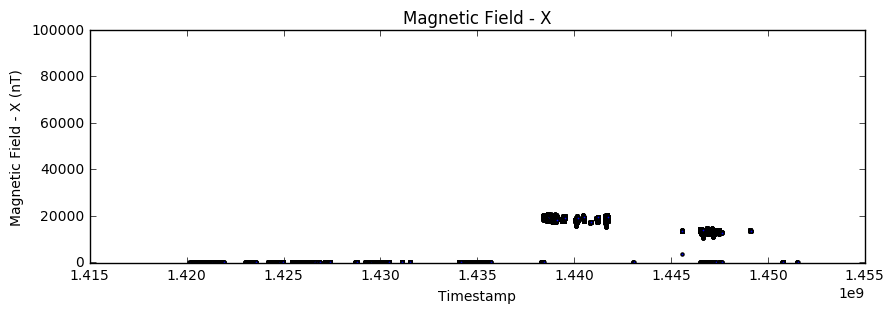

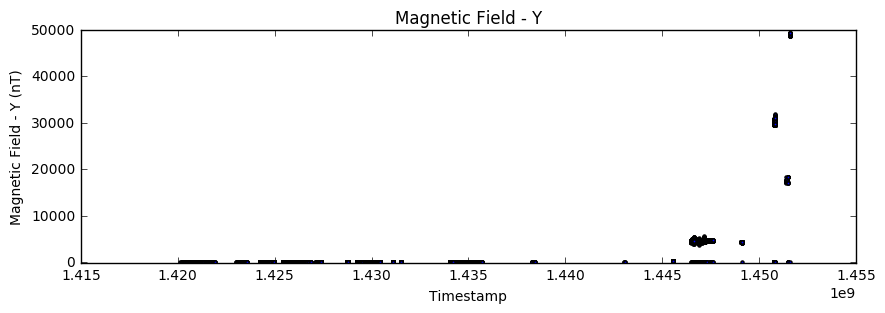

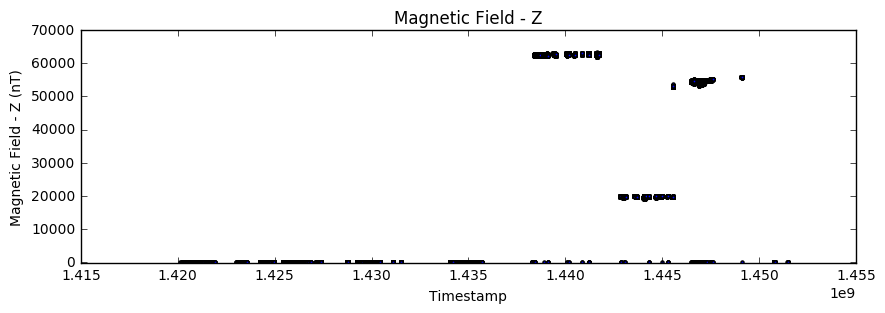

In [34]:
from data_util.data_analyze import *

d,N = X.shape

standard = ['Timestamp', 'Magnetic Field - X (nT)', 'Magnetic Field - Y (nT)', 'Magnetic Field - Z (nT)', 
            'Negative Air Ions (ions/cm3)', 'Positive Air Ions (ions/cm3)', 'Ozone (ppb)', 'Carbon Monoxide (ppm)']

station = 'station6'

print "Data from Station 6"
for i in range(d-1):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print standard[i]
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])

# plot the raw observations for Magnetic Field - X
figure = plot_predictor(X[0], X[1], xlabel='Timestamp', ylabel='Magnetic Field - X (nT)', title='Magnetic Field - X', 
                        ylimit=[-100,100000])
figure.savefig(station+'_mag_x.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Y
figure = plot_predictor(X[0], X[2], xlabel='Timestamp', ylabel='Magnetic Field - Y (nT)', title='Magnetic Field - Y', 
                        ylimit=[-100,50000])
figure.savefig(station+'_mag_y.png', bbox_inches='tight')

# plot the raw observations for Magnetic Field - Z
figure = plot_predictor(X[0], X[3], xlabel='Timestamp', ylabel='Magnetic Field - Z (nT)', title='Magnetic Field - Z', 
                        ylimit=[-100,70000])
figure.savefig(station+'_mag_z.png', bbox_inches='tight')